In [2]:
from validator.Validate import SolutionCO22
from validator.InstanceCO22 import InstanceCO22
import seaborn as sns 
import matplotlib.pyplot as plt 
import math
from util import *
%load_ext autoreload
%autoreload 2
sns.set()

In [12]:
instance = loadInstance(2)
instance.Locations

[    1    63    92,
     2    98    30,
     3    52    33,
     4    39    64,
     5    18    98,
     6    14    60,
     7    19    29,
     8    25    29,
     9     5    74,
    10    65    15,
    11    34    64,
    12    63    94,
    13     3    41,
    14    67    83,
    15    55    53,
    16    32    91,
    17    93    78,
    18    61     7,
    19    53     3,
    20    12    27,
    21    28    46,
    22    81    24,
    23    50    83]

In [ ]:
instance.TruckDayCost

200

## Instance in complete

In [5]:
def plotInstance(instance):
    plt.figure(figsize=(7,7))
    locX = [_.X for _ in instance.Locations]
    locY = [_.Y for _ in instance.Locations]
    nHubs = len(instance.Hubs)
    plt.scatter(locX[0], locY[0], marker=",", label="Depot")
    plt.scatter(locX[1:1+nHubs], locY[1:1+nHubs],marker="^", label="Hub")
    plt.scatter(locX[1+nHubs:], locY[1+nHubs:],marker='.')
    plt.legend()

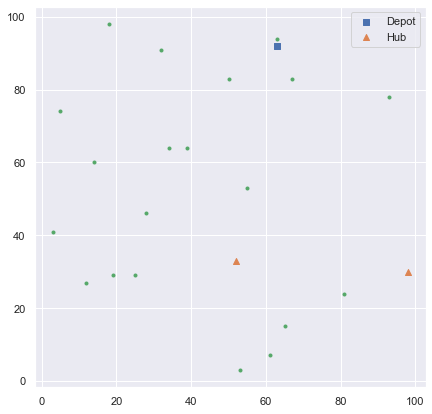

In [6]:
plotInstance(instance)

## Instance per day

In [7]:
instance = loadInstance(10)

In [8]:
def plotInstancePerDay(instance):
    nDays = instance.Days
    nCol = 5
    fig, axs = plt.subplots(ncols= nCol, nrows = int(math.ceil(nDays/nCol)), figsize=(20,15), sharex=True, sharey=True)
    requests_copy = instance.Requests.copy()
    nHubs = len(instance.Hubs)
    locX = [_.X for _ in instance.Locations]
    locY = [_.Y for _ in instance.Locations]
    depotX, depotY = instance.Locations[0].X, instance.Locations[0].Y
    hubsX = locX[1:1+nHubs]
    hubsY = locY[1:1+nHubs]
    row, col = None, None
    for i in range(1,instance.Days+1):
        requests_for_day = [_ for  _ in requests_copy if _.desiredDay is i]
        loc_ids = [_.customerLocID for _ in requests_for_day]
        locations = [_ for _ in instance.Locations if _.ID in loc_ids]
        locX_day = [_.X for _ in locations]
        locY_day = [_.Y for _ in locations]
        row = math.ceil(i/nCol)-1
        col = (i-1)%nCol
        axs[row][col].scatter(locX, locY, marker='.',alpha=0.1, c='black', label="Loc w/0 request")
        axs[row][col].scatter(locX_day, locY_day, marker='.', c='black', label="Loc w/ request")
        axs[row][col].scatter(hubsX, hubsY,marker="^", label="Hub")
        axs[row][col].scatter(depotX, depotY, marker=',', label="Depot")
        axs[row][col].set_title(f"desiredDay {i}")
    handles, labels = axs[row][col].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right')


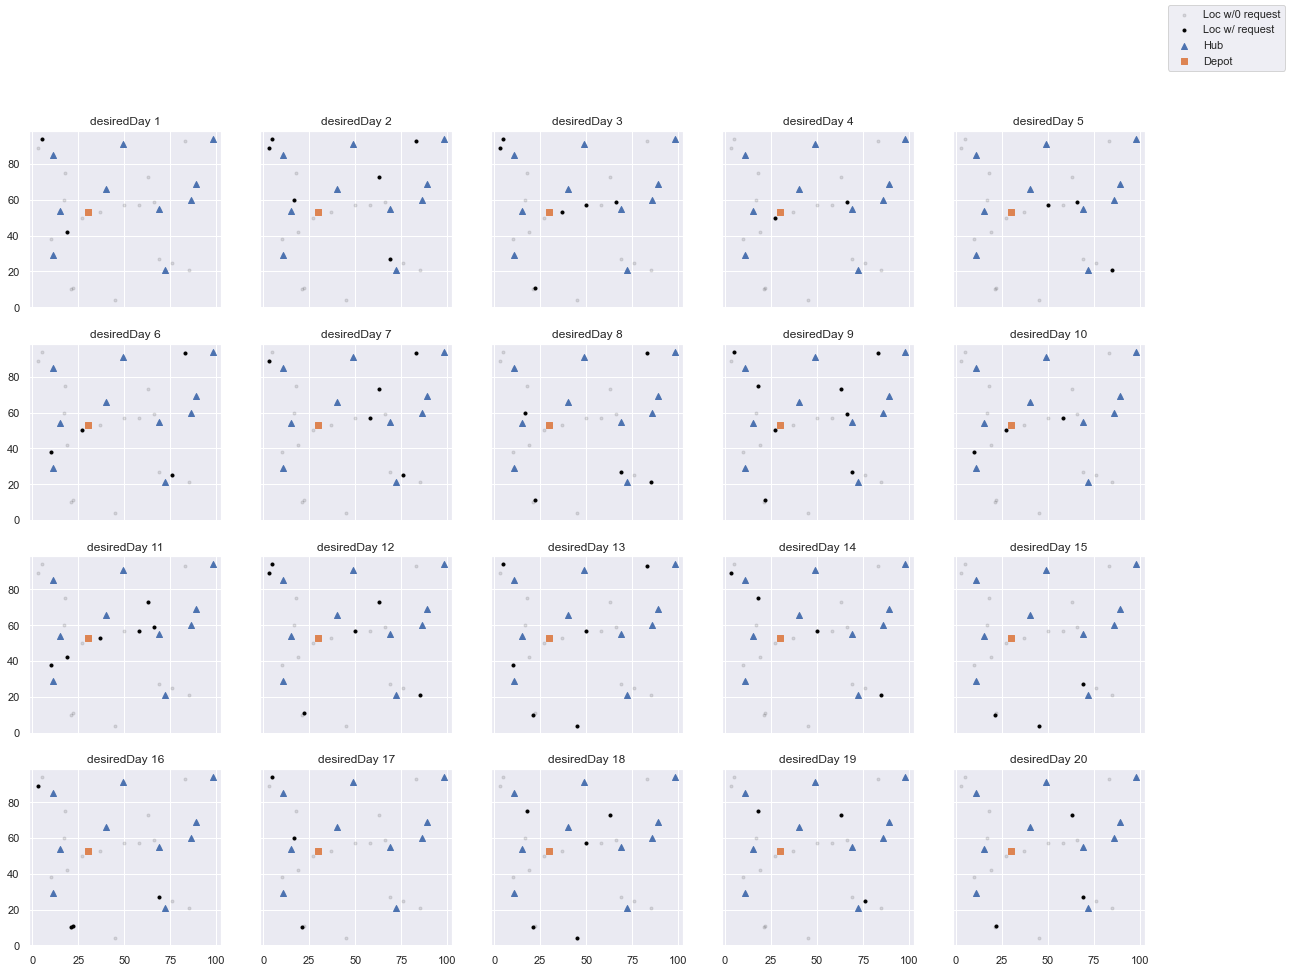

In [9]:
plotInstancePerDay(instance)

In [13]:
instance.__dict__

{'errorReport': [],
 'warningReport': [],
 'inputfile': './Instances/Instance_1-10/Instance_2.txt',
 'breakOnError': True,
 'type': 'txt',
 'Products': [    1    11],
 'Requests': [Id: 1 desiredDay 1 customerLocID 4 amounts = 4,,
  Id: 2 desiredDay 1 customerLocID22 amounts = 3,,
  Id: 3 desiredDay 1 customerLocID12 amounts = 9,,
  Id: 4 desiredDay 1 customerLocID23 amounts = 9,,
  Id: 5 desiredDay 1 customerLocID22 amounts = 8,,
  Id: 6 desiredDay 1 customerLocID16 amounts = 2,,
  Id: 7 desiredDay 1 customerLocID 7 amounts = 4,,
  Id: 8 desiredDay 1 customerLocID 6 amounts = 1,,
  Id: 9 desiredDay 1 customerLocID11 amounts = 9,,
  Id:10 desiredDay 1 customerLocID 6 amounts = 3,,
  Id:11 desiredDay 1 customerLocID 8 amounts = 2,,
  Id:12 desiredDay 2 customerLocID12 amounts = 5,,
  Id:13 desiredDay 2 customerLocID12 amounts = 6,,
  Id:14 desiredDay 2 customerLocID 5 amounts = 2,,
  Id:15 desiredDay 2 customerLocID12 amounts = 9,,
  Id:16 desiredDay 2 customerLocID11 amounts = 8,,
  Id:

In [72]:
i=2
instance = loadInstance(i)
solution = SolutionCO22(f"./alg1_batch/solution{i}.txt" ,instance, 'txt')

VanDistancePerDay=[253, 182, 263, 313, 348, 322, 299, 297, 308, 194, 190, 324, 375, 263, 353, 284, 297, 374, 391, 279]
TruckDistancePerDay=[180, 122, 180, 180, 180, 180, 180, 180, 180, 180, 122, 180, 180, 180, 180, 180, 180, 180, 180, 180]
HubsUsed ={1, 2}


In [73]:
solution.__dict__

{'Instance': <validator.InstanceCO22.InstanceCO22 at 0x7fcfec6a0850>,
 'errorReport': [],
 'warningReport': [],
 'inputfile': './alg1_batch/solution2.txt',
 'breakOnError': True,
 'type': 'txt',
 'Days': [<validator.Validate.SolutionCO22.SolutionDay at 0x7fcfec72d7f0>,
 'givenCost': <validator.Validate.SolutionCO22.SolutionCost at 0x7fcfec6a0ee0>,
 'calcCost': <validator.Validate.SolutionCO22.SolutionCost at 0x7fcfec6a0a60>,
 'Dataset': 'CO2022_11',
 'HubsUsed': {1, 2}}

In [29]:
solution.calcCost.__dict__

{'TruckDistance': 4472,
 'NrTruckDays': 18,
 'NrTrucksUsed': 1,
 'VanDistance': 3276,
 'NrVanDays': 30,
 'NrVansUsed': 2,
 'Cost': 128800,
 'HubsUsed': None,
 'HubCost': 0,
 'CumulativeEarlyPenalty': 0}

In [67]:
solution.Days[8].TruckRoutes[0].__dict__

{'ID': 1, 'Route': [1], 'Amounts': [[7]], 'calcDistance': None}

In [70]:
solution.Days[11].__dict__

{'dayNumber': 12,
 'NrTruckRoutes': 1,
 'TruckRoutes': [<validator.Validate.SolutionCO22.TruckRoute at 0x7fcfec677af0>],
 'NrVanRoutes': 2,
 'VanRoutes': [<validator.Validate.SolutionCO22.VanRoute at 0x7fcfec677b80>,
  <validator.Validate.SolutionCO22.VanRoute at 0x7fcfec677c10>]}

In [31]:
dir(solution)

['BaseParseException',
 'Dataset',
 'Days',
 'FoodOnAHubOnGivenDay',
 'HubsUsed',
 'Instance',
 'LANG',
 'SolutionCost',
 'SolutionDay',
 'TruckRoute',
 'VanRoute',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_calculateSolution',
 '_checkAssignment',
 '_checkError',
 '_checkHub',
 '_checkInt',
 '_checkWarning',
 '_doinit',
 '_getNextLine',
 '_initData',
 '_initFile',
 '_initTXT',
 '_initType',
 '_isAssignment',
 '_readDay',
 '_readTextCost',
 '_writeAssignment',
 'areGivenValuesValid',
 'breakOnError',
 'calcCost',
 'errorReport',
 'givenCost',
 'inputfile',
 'isValid',
 'parsertype',
 'type',
 'warningReport']

In [7]:

print([min([_.daysFresh for _ in loadInstance(i).Products]) for i in range(1,31)])

[11, 11, 4, 4, 4, 4, 4, 4, 4, 4, 11, 11, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
